# LSTM

### Predicting stock market fluctuations

Note: although this is a very common example for success in digital media, I find this example to poorly reflect real and uesful predictions (see below). However, it is a decent reference for an RNN

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data

In [129]:
df = pd.read_csv('VIX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-04-12,17.580000,18.459999,16.879999,17.090000,17.090000,0
1,2011-04-13,16.330000,17.379999,16.200001,16.920000,16.920000,0
2,2011-04-14,17.770000,18.080000,16.080000,16.270000,16.270000,0
3,2011-04-15,15.970000,15.980000,14.920000,15.320000,15.320000,0
4,2011-04-18,18.299999,19.070000,16.809999,16.959999,16.959999,0


In [130]:
df.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
df.head()

,Date,Adj Close
0,2011-04-12,17.090000
1,2011-04-13,16.920000
2,2011-04-14,16.270000
3,2011-04-15,15.320000
4,2011-04-18,16.959999


In [131]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df.head()

,Adj Close
Date,
2011-04-12,17.090000
2011-04-13,16.920000
2011-04-14,16.270000
2011-04-15,15.320000
2011-04-18,16.959999


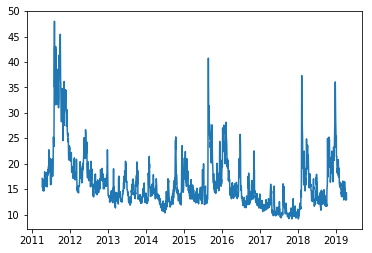

In [132]:
plt.plot(df)
plt.show()

Correlation between t+1 and t (which is the commonly saught after prediction to make) - clearly teaching an algorithm to reproduce an already highly correlated relationship is not very powerful

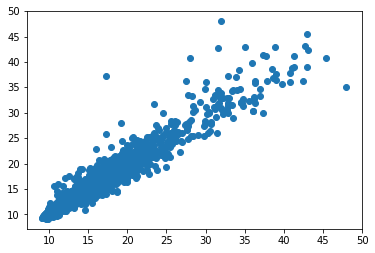

In [134]:
X = df[:-1].values
y = df[1:].values
plt.scatter(X,y)
plt.show()

Instead, I think a better metric is to assess the ability to predict the daily difference

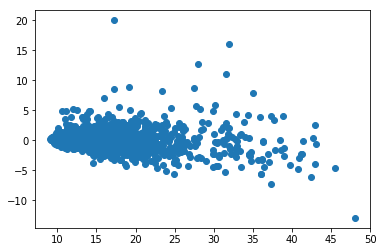

In [135]:
X = df[:-1].values
y = df[1:].values
plt.scatter(X,y-X)
plt.show()

### Train/test split (simple)

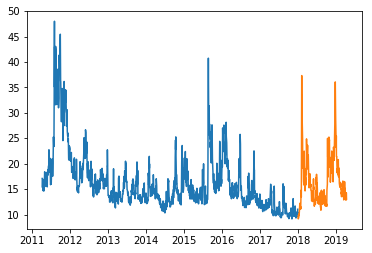

In [137]:
split_date = pd.Timestamp('2018-01-01')
train = df.loc[:split_date]['Adj Close']
test = df.loc[split_date:]['Adj Close']
plt.plot(train)
plt.plot(test)
plt.show()

In [165]:
# scale
s_train = (train-train.mean())/train.std()
s_test = (test-train.mean())/train.std()

# one day shift, add dimension for LSTM
X_train = s_train[:-1][:,None][:,None]
y_train = s_train[1:][:,None]
X_test = s_test[:-1][:,None][:,None]
y_test = s_test[1:][:,None]

### Fitting

In [166]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [167]:
model = Sequential()
model.add(LSTM(7, input_shape=(1, X_train_lmse.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
1691/1691 [==============================] - 2s 951us/step - loss: 0.9061
Epoch 2/10
1691/1691 [==============================] - 1s 362us/step - loss: 0.5885
Epoch 3/10
1691/1691 [==============================] - 1s 365us/step - loss: 0.2533
Epoch 4/10
1691/1691 [==============================] - 1s 364us/step - loss: 0.1074
Epoch 5/10
1691/1691 [==============================] - 1s 362us/step - loss: 0.0813
Epoch 6/10
1691/1691 [==============================] - 1s 364us/step - loss: 0.0761
Epoch 7/10
1691/1691 [==============================] - 1s 359us/step - loss: 0.0736
Epoch 8/10
1691/1691 [==============================] - 1s 362us/step - loss: 0.0715
Epoch 9/10
1691/1691 [==============================] - 1s 370us/step - loss: 0.0710
Epoch 10/10
1691/1691 [==============================] - 1s 382us/step - loss: 0.0700


### Prediction

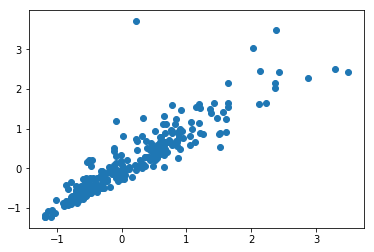

In [168]:
pred = model.predict(X_test)
plt.scatter(pred,y_test)
plt.show()

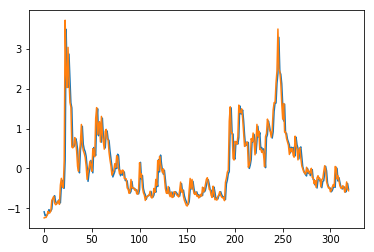

In [169]:
plt.plot(pred)
plt.plot(y_test)
plt.show()

Supposedly impecable fitting

### Prediction value

In [175]:
p = pred[:,0]
x = X_test[:,0,0]
y = y_test[:,0]

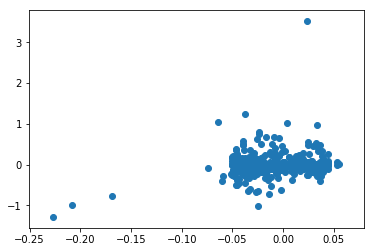

In [180]:
plt.scatter(p-x,y-x)
plt.show()

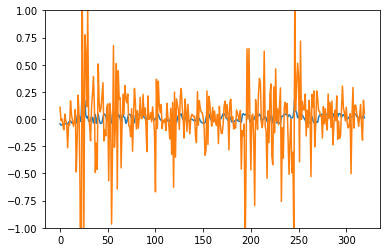

In [183]:
plt.plot(x-p)
plt.plot(x-y)
plt.ylim(-1,1)
plt.show()

Clearly, the ability of the model to predict the daily difference is very limited (and therefore not useful in practice). This is to be expected from such a simple and naive model